# Exploratory data analysis of Amazon product dataset 

## Introduction
Exploratory data analysis (EDA) is a process of investigating datasets, searching for some trends and patterns, and summarising main characteristics, obtaining meaningful conclusions. There are a great many multipurpose tools available to obtain, store, clean, filter, and visualise data, and Python is one of those. An undoubtful advantage of Python is the abundance of libraries and packages, especially developed to resolve quantitative tasks, related to data analysis.

## Methodology
In the present project, Python libraries solely have been utilised to conduct EDA. Packages used in this project include Pandas, NumPy, MatPlotLib, and some others (such as Counter, math, seaborn).
Dataset was retrieved from kaggle.com (Link: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) 

## Content:
[I) Uploading the data](#section1) 

1. [Getting the data](#section1-1)
2. [Basic information](#section1-2)
3. [Summary](#section1-3)

[II) Cleaning and filtering](#section2)

1. [Checking for duplicates](#section2-1)
2. [Links](#section2-2)
    - [Investigation of duplicates](#section2-2-1)
    - [Summary](#section2-2-2)
3. [Categories](#section2-3)
4. [Prices](#section2-4)
5. [Discount percentages](#section2-5)
6. [True discount values](#section2-6)
7. [Ratings](#section2-7)
8. [Rating count](#section2-8)
9. [Selecting the columns](#section2-9)

[III) Analytical visualisation](#section3)

1. [Main categories share](#section3-1)
    - [Preparing the data](#section3-1-1)
    - [Plotting](#section3-1-2)
    - [Summary](#section3-1-3)
2. [Top 5 product types in major categories](#section3-2)
    - [Preparing the data](#section3-2-1)
    - [Plotting](#section3-2-2)
    - [Summary](#section3-2-3)
3. [Prices analysis](#section3-3)
    - [Preparing the data](#section3-3-1)
    - [Plotting](#section3-3-2)
    - [Summary](#section3-3-3)
4. [Subcategories exploration](#section3-4)
5. [Discounts exploration](#section3-5)
    - [Preparing the data](#section3-5-1)
    - [Plotting](#section3-5-2)
    - [Summary](#section3-5-3)
6. [Ratings](#section3-6)
    - [Preparing the data](#section3-6-1)
    - [Plotting](#section3-6-2)
    - [Summary](#section3-6-3)
7. [Correlation estimation](#section3-7)
    - [Preparing the data](#section3-7-1)
    - [Plotting](#section3-7-2)
    - [Summary](#section3-7-3)
8. [Actual price-Discount amount correlation](#section3-8)
    - [Preparing the data](#section3-8-1)
    - [Plotting](#section3-8-2)
    - [Summary](#section3-8-3)

[IV) Final Conclusions](#section4)

# I) Uploading the data <a id='section1'></a>

### **1. Getting the data (keeping the original)** <a id='section1-1'></a>

- Required libraries 

In [1]:
import pandas as pd 
import numpy as np 
from collections import Counter
import math
import re
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [ ]:
df_orig = pd.read_csv('C:/***/amazon.csv') # path is hidden
df = df_orig.copy()

### **2. Basic information** <a id='section1-2'></a>

In [4]:
df.shape

(1465, 16)

In [48]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [49]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


The dataset contains product IDs, names, and categories; actual and discount prices, discount percentages; ratings and ratings count (number of people who rated a product); brief product description; IDs of users who left reviews, their names; IDs, titles, and content of reviews; products and images links.

In [50]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### **Summary** <a id='section1-3'></a>
- The dataset contains 16 columns and 1465 rows;
- All the columns are in "object" format;
- There are two NA values in the entire dataset located in rating_count column 

# II) Cleaning and filtering <a id="section2"></a>

### **1. Checking for duplicates** <a id="section2-1"></a>

In [51]:
df.duplicated().sum()

0

### **2. Links**

The dataset contains columns with links to product web pages and their pictures, which are redundant in the context of 
the present project

In [30]:
df.drop(['img_link', 'product_link'], axis=1, inplace=True)

In [53]:
#Double check for duplicates
df.duplicated().sum()

65

After removing product and image links, 65 duplicates have appeared. The nature of duplicates requires thorough investigation.


<a id="section2-2-1"></a>
* Investigation of duplicates

Duplicates appeared after products and image links were removed. It means that some of the products share the same links.

In [54]:
#with img_link, without product_link
df_orig.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link']).sum()

19

In [55]:
    #with product_link, without img_link
df_orig.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'product_link']).sum()

0

The subset, containing product links, does not have duplicated values, which means that there are 19 products that share all 
the information, including image links.

Since duplicated values appeared, it means that some products also share a unique ID.

In [56]:
df.duplicated(subset=['product_id']).sum()

114

In [57]:
df_orig.duplicated(subset=['product_id', 'product_link']).sum()

0

Indeed, there are 114 products that share the same ID. Moreover, every product still has a unique link, which means that even products with the same ID in the end are still different products.

Therefore:
- Among those 114 products with the same ID there are 65 sharing exactly the same information (excluding product and image links)
- Among those 65 products, 19 have the same image link
The last statement is confirmed down bellow.

In [58]:
    #list of indices of 65 duplicates
df_dup_ls = df.loc[df.duplicated()].index

    #list of indices of 19 duplicates
df_orig_dup_ls = df_orig.loc[df_orig.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link'])].index

In [59]:
def match_values(x, y):
    ''' The function takes two lists of integers, x and y,
    and checks whether values from y are presented in x.
    If yes, it returns a list of matching values;
    if no matching values are found, returns 'No similar values.'
    '''
    match = [y[i] for i in range(len(y)) if y[i] in x]
    if len(match) == 0:
        print('No atching values.')
    else:
        match.sort()
    return match

match = match_values(df_dup_ls, df_orig_dup_ls)
print(f'{match} | {len(match)}')


[622, 668, 689, 692, 714, 731, 771, 836, 857, 885, 894, 925, 938, 968, 974, 983, 985, 1000, 1018] | 19


Thus, it is confirmed that among 65 duplicates, 19 are exactly the same product with the same image link, but located on different web pages

#### **Summary** <a id="section2-2-2"></a>

1. There are no duplicates when all columns are used for searching;
2. When only 'img_link' is excluded, the result is still 0;
3. Exclusion of 'product_id' and keeping of 'img_link' results in 19 duplicates;
    it means that some products share all information, including images, but are located on different web-pages
4. Using 'product_id' solely for search, 114 duplicates appear;
    it means some products differ in some information, including product links 
    (since there are no duplicates found whenever product link is included in search);
    this leads us to conclusion that some products are the same, but may have more than one web-page; 
5. Further exclusion of both 'img_link' and 'product_link' returns 65 duplicates;
    this means that some products share all information, but have different images and located on different pages;

Duplicates can bring unnecessary noise in further data analysis and certainly should be dealt with. However, rushing to conclusions and removing duplicates may also compromise results. Thus, any data analysis requires a thorough exploration of duplicates and individual approach when dealing with duplicated information in the dataset.

In the present case, 65 duplicated rows share all the information, except the image and product links, and among those
there are 19 share all the information, except for product links, and 0 that are duplicated completely.
Since it is a personal project and there are no any specific requirements, those 65 duplicated rows are considered as 
true duplicates and can be filtered out.


In [3]:
df = df_orig.copy()
df.drop(['img_link', 'product_link'], axis=1, inplace=True)
df = df.loc[~df.duplicated()].reset_index(drop=True)

### **3. Categories** <a id="section2-3"></a>

In [13]:
df['category'].head(10)

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
5    Computers&Accessories|Accessories&Peripherals|...
6    Computers&Accessories|Accessories&Peripherals|...
7    Computers&Accessories|Accessories&Peripherals|...
8    Computers&Accessories|NetworkingDevices|Networ...
9    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

It can be seen that a category of every product consists of multiple entries, separated with "|". Assuming that elements in the category are placed on the scale from greater to smaller, it would mean that the 1st element represents the main category, while the last could be considered as a specific type of product.
Regarding those elements in between the first and last ones, they could be treated as subcategories, and the number of values in them varies. It can be assumed that the first element in every compound subcategory solely can be used to define the entire subcategory.

Note: Categorical and subcategorical segregation, mentioned above, are arbitrary. It is based on personal assumptions and judgment, and may not reflect the real segregation. 

For the convenience of further analysis, categories could be split as suggested above, in categories, subcategories, and types of products.

In [4]:
#splitting category on main and subcategory
df[['main_category', 'subcategory']] = df['category'].str.split('|', n=1, expand=True)

#splitting subcategory on subcategory and product type
df['subcategory1'] = df['subcategory'].str.rsplit('|', n=1, expand=True)[0]
df['product'] = df['subcategory'].str.rsplit('|', n=1, expand=True)[1]

#splitting subcategory
df[['subcat_main', 'subcat_further']] = df['subcategory'].str.split('|', n=1, expand=True)

#rearranging new columns
df.insert(2, 'main_category', df.pop('main_category'))

df.drop(['subcategory'], axis=1, inplace=True)
df.insert(3, 'subcategory_main', df.pop('subcat_main'))
df.insert(4, 'subcategory_further', df.pop('subcat_further'))

df.insert(5, 'product_type', df.pop('product'))

df.drop(['category'], axis=1, inplace=True)
df.drop(('subcategory1'), axis=1, inplace=True)

df.head(3)

,product_id,product_name,main_category,subcategory_main,subcategory_further,product_type,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables,USBCables,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables,USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables,USBCables,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."


### **4. Prices** <a id="section2-4"></a>

In [63]:
df[['actual_price', 'discounted_price']].dtypes

actual_price        object
discounted_price    object
dtype: object

In [4]:
df[['actual_price', 'discounted_price']].head()

,actual_price,discounted_price
0,"₹1,099",₹399
1,₹349,₹199
2,"₹1,899",₹199
3,₹699,₹329
4,₹399,₹154


In [6]:
#check for NAs
df[['discounted_price', 'actual_price']].isna().sum()

discounted_price    0
actual_price        0
dtype: int64

Prices are given as objects. Moreover, every price has a currency sign (₹, Indian rupee) in front, and commas are used to separate thousands. There are no NAs in these two columns.

The columns can be renamed so to reflect the currency after tags are removed.

In [10]:
#rename price columns
df.rename(columns={'discounted_price':'discounted_price_rupee', 'actual_price':'actual_price_rupee'}, inplace=True)

In order to reveal any unusual number patterns or unconventional symbols, RegEx technique can be applied. 

In [8]:
def reg_ex_search(pat, array):
    ''' The function searches for the first appearance 
    of a pattern [pat] in a given array [array].
    
    It also prints out indexes of all NULL values, if any were found.
    '''
    pattern = re.compile(pat)
    rng = list(array.index)
    
    search_res = []
    error_null = []
    for i in rng:
        if type(array[i]) != float:
            match = pattern.search(array[i])
            if match:
                search_res.append(i)
        else:
            error_null.append(i)
    
    if len(search_res) == 0:
        print('No matches found')
        
    if len(error_null) > 0: 
        print('WARNING! Null values were found at: {}'.format(error_null))
        
    return search_res
    

To test the written above RegEx function, pandas string method can be utilised.

In [12]:
# Searching for values that have a dot at any position
function_res = reg_ex_search(r'[^₹\d,]', df['discounted_price_rupee'])
str_meth_res = df.loc[df['discounted_price_rupee'].str.contains('.', regex=False), 'discounted_price_rupee']

test = []
for i, ind1 in enumerate(function_res):
    for j, ind2 in enumerate(list(str_meth_res.index)):
        if i==j:
            if ind1 != ind2:
                test.append([ind1, ind2])
print('Mismatches have been found at: {}\n Original lists of indexes are: \n{}\n{}'.format(test, function_res, list(str_meth_res.index)))

Mismatches have been found at: []
 Original lists of indexes are: 
[6, 111, 178, 219, 234, 281, 418, 658, 1205, 1294, 1352, 1413, 1439, 1455]
[6, 111, 178, 219, 234, 281, 418, 658, 1205, 1294, 1352, 1413, 1439, 1455]


The RegEx function works properly since it has returned the same index values as the pandas string method.

In [27]:
results = reg_ex_search(r'[^₹\d,]', df['actual_price_rupee'])
df['actual_price_rupee'].loc[results]

35       ₹666.66
507      ₹666.66
831    ₹4,332.96
Name: actual_price_rupee, dtype: object

Apparently, prices have commas as thousands separators and dots as decimal points. Neither column contains any unusual characters, commas and dots appear to be at the right positions within each value.

Therefore, normalisation of the prices includes: 1) removing currency tags; 2) removing thousand-separating commas; 3) converting to float type.

In [28]:
#discounted prices
df['discounted_price_rupee'].replace('₹', '', regex=True, inplace=True)
df['discounted_price_rupee'].replace(',', '', regex=True, inplace=True)

df['discounted_price_rupee'] = df['discounted_price_rupee'].astype('float')

In [29]:
#actual prices
df['actual_price_rupee'].replace('₹', '', regex=True, inplace=True)
df['actual_price_rupee'].replace(',', '', regex=True, inplace=True)

df['actual_price_rupee'] = pd.to_numeric(df['actual_price_rupee'])

### **5. Discount percentages** <a id="section2-5"></a>

In [13]:
df['discount_percentage'].head()

0    64%
1    43%
2    90%
3    53%
4    61%
Name: discount_percentage, dtype: object

Discount percentages are given in object data type. Values contain the percentage sign "%" at the back.

In [31]:
#Searching for deviated values that do not contain digits or percent sign
results = reg_ex_search(r'[^\d%]', df['discount_percentage'])

No matches found


There are no any unconventional characters or NA values, only digits and percentage signs.

Then, normalisation includes: 1) removing the percentage sign; 2) converting to the integer type

In [32]:
df['discount_percentage'].replace('%', '', regex=True, inplace=True)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], downcast='integer')

### **6. True discount values** <a id="section2-6"></a>

There are only discount percentages provided in the given dataset; however, knowing the real discount values may help to better estimate significance of discounts.

In [33]:
df['discount_amount_rupee'] = df['actual_price_rupee'] - df['discounted_price_rupee']

#replacing the new column
df.insert(7, 'discount_amount_rupee', df.pop('discount_amount_rupee'))

### **7. Ratings** <a id="section2-7"></a>

In [34]:
df['rating'].head()

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: object

Ratings are decimal numbers, decimal point is a dot. RegEx method can be used to check if there are: 1) more than one digit before decimal; 2) more than one digit after decimal; 3) any other unconventional symbols.

In [56]:
dig_bef_dec = reg_ex_search(r'\d{2}\.', df['rating'])
dig_after_dec = reg_ex_search(r'\.\d{2}', df['rating'])
other_dec = reg_ex_search(r'[^\d\.]', df['rating'])

print(f'''\nMore than one digit before the decimal at: \n{dig_bef_dec}\n 
More than one digit after the decimal at: \n{dig_after_dec}\n
Unconventional characters at: \n{other_dec}''')

No matches found
No matches found

More than one digit before the decimal at: 
[]
 
More than one digit after the decimal at: 
[]

Unconventional characters at: 
[1214]


The data type is the object. Also, there appears to be an unexpected value ('|').

In [30]:
df.loc[df['rating']=='|']

,product_id,product_name,main_category,subcategory_main,subcategory_further,product_type,discounted_price_rupee,discount_amount_rupee,actual_price_rupee,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
1214,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,Home&Kitchen,Kitchen&HomeAppliances,"Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacu...",HandheldVacuums,2099.0,400.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


Having a closer look at the product, we see that although the rating count equals 992, the rating itself is missing. Individual ratings are unknown so an average cannot be calculated. It is also impossible to draw any conclusions based on the review column. 

In order to avoid its influence on further statistical calculations (median, mean, etc.), this value will be replaced with NA

In [57]:
#inserting NA
df['rating'].replace('|', np.nan, regex=False, inplace=True)

#convert to float
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

### **8. Rating count** <a id="section2-8"></a>

In [42]:
df['rating_count'].head()

0    24,269
1    43,994
2     7,928
3    94,363
4    16,905
Name: rating_count, dtype: object

Rating counts contain commas as thousands separators. Data type - object. 

In [59]:
#Searching for any characters that are not a digit or comma
results = reg_ex_search(r'[^\d,]', df['rating_count'])

No matches found
WARNING! Null values were found at: [282, 324]


There are no unusual characters.

In [60]:
#getting rid of commas
df['rating_count'].replace(',', '', regex=True, inplace=True)

However, there have been found 2 NA values at the positions [282, 324].

In [34]:
df['rating_count'].isna().sum()

2

In [83]:
df.loc[[282, 324]]

,product_id,product_name,main_category,sub_category,product_type,discounted_price_rupee,actual_price_rupee,discount_amount_rupee,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cables,USBCables,199.0,999.0,800.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cables,USBCables,249.0,999.0,750.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...


In [27]:
df.loc[282, 'review_content']

"I have a pd supported car charger and I bought solimo cables previously which work perfectly fine but this one doesn't trigger full 3A fast charging unlike solimo usb a to usb c, which is strange because this is supposed to be a 65W charger with 4A fast charging support.Anyways it's a good built product and works but not as expected. It might be compatible with your chargers but I tested 2 different car chargers and both didn't go full speed."

In [85]:
df.loc[324, 'review_content']

'Quick delivery.Awesome ProductPacking was goodJust opened the productExcited to you it'

With a closer look, it can be seen that although rating counts for those 2 products are NAs, the ratings themselves are given (3.0 and 5.0, respectively). Hence, NAs cannot be simply replaced with zeros or random values.

However, when turning to a review section, it can be noticed that there is only one review per product. If to read through, it can be also noticed that the content of reviews roughly reflects corresponding ratings. Therefore, it can be assumed that each of these two products had only one person to rate. 

Thus, NA values can be replaced with "1".

In [61]:
    #filling NAs
df['rating_count'] = df['rating_count'].fillna(1).apply(np.int64)

### **9. Selecting the columns** <a id="section2-9"></a>

At the present phase of this project, columns containing information about users and reviews are not needed.

In [62]:
# df.columns
df = df[['product_id', 'product_name', 'main_category', 'subcategory_main',
       'subcategory_further', 'product_type', 'discounted_price_rupee', 
       'actual_price_rupee', 'discount_amount_rupee', 'discount_percentage', 
       'rating', 'rating_count']]

In [40]:
df.to_csv('C:/***/F_JUP_amazon.csv', index=False) #path is hidden

Now the dataset appears manageable, some statistic evaluations and visualisations can be carried out.

# III) Analysis and visualisations <a id='section3'></a>

### **1. Main categories share** <a id="section3-1"></a>

Product categories were split into main, subcategories, and product types. Subcategories contain different number of elements and are not considered in the present project. However, main categories depict the major groups that products a segregated into and can provide valuable information about the structure of the data.

<a id="section3-1-1"></a>
- Count of categories

In [3]:
cat_cnt = Counter(df['main_category'])
print(cat_cnt)

Counter({'Electronics': 515, 'Home&Kitchen': 448, 'Computers&Accessories': 399, 'OfficeProducts': 31, 'MusicalInstruments': 2, 'HomeImprovement': 2, 'Toys&Games': 1, 'Car&Motorbike': 1, 'Health&PersonalCare': 1})


There are in total 9 main categories; however, among those only 3 account for more than a hundred sales; hence, those could be considered as major categories in the context of the present project: Electronics, Home&Kitchen, Computers&Accessories. On the other hand, the other 6 categories could be considered as minor, and grouped together as "Others".

In [4]:
#isolating 3 major groups
maj_cat = dict(cat_cnt.most_common(3))

    #sales some of minor categories
oth_dict = {}
for i in range(len(list(cat_cnt.keys()))):
    for j in range(len(list(cat_cnt.values()))):
        if i == j and list(cat_cnt.keys())[i] not in maj_cat.keys():
            oth_dict[list(cat_cnt.keys())[i]] = list(cat_cnt.values())[j]          
oth_val = sum(oth_dict.values())

    #adding 'Others' categories as one of the major categories
maj_cat['Others'] = oth_val

- Subcategories

Extracting subcategories of 3 main categories

In [5]:
el_subcat_cnt = Counter(df.loc[df['main_category']=='Electronics', 'subcategory_main'])
hk_subcat_cnt= Counter(df.loc[df['main_category']=='Home&Kitchen', 'subcategory_main'])
ca_subcat_cnt = Counter(df.loc[df['main_category']=='Computers&Accessories', 'subcategory_main'])

#sorting the values
el_subcat_cnt = dict(sorted(dict(el_subcat_cnt).items(), key=lambda x: x[1]))
hk_subcat_cnt= dict(sorted(dict(hk_subcat_cnt).items(), key=lambda x: x[1]))
ca_subcat_cnt = dict(sorted(dict(ca_subcat_cnt).items(), key=lambda x: x[1]))

Extracting subcategories for the "Others"

In [ ]:
df_tmp = pd.DataFrame()
for i in range(len(df['main_category'])):
    if df['main_category'][i] in list(oth_dict.keys()):
        df_tmp = df_tmp.append(pd.DataFrame(df.loc[[i], 'subcategory_main']), ignore_index=True)
oth_subc_cnt = Counter(df_tmp['subcategory_main'])

<a id="section3-1-2"></a>
- Categories and subcategories share visualisation

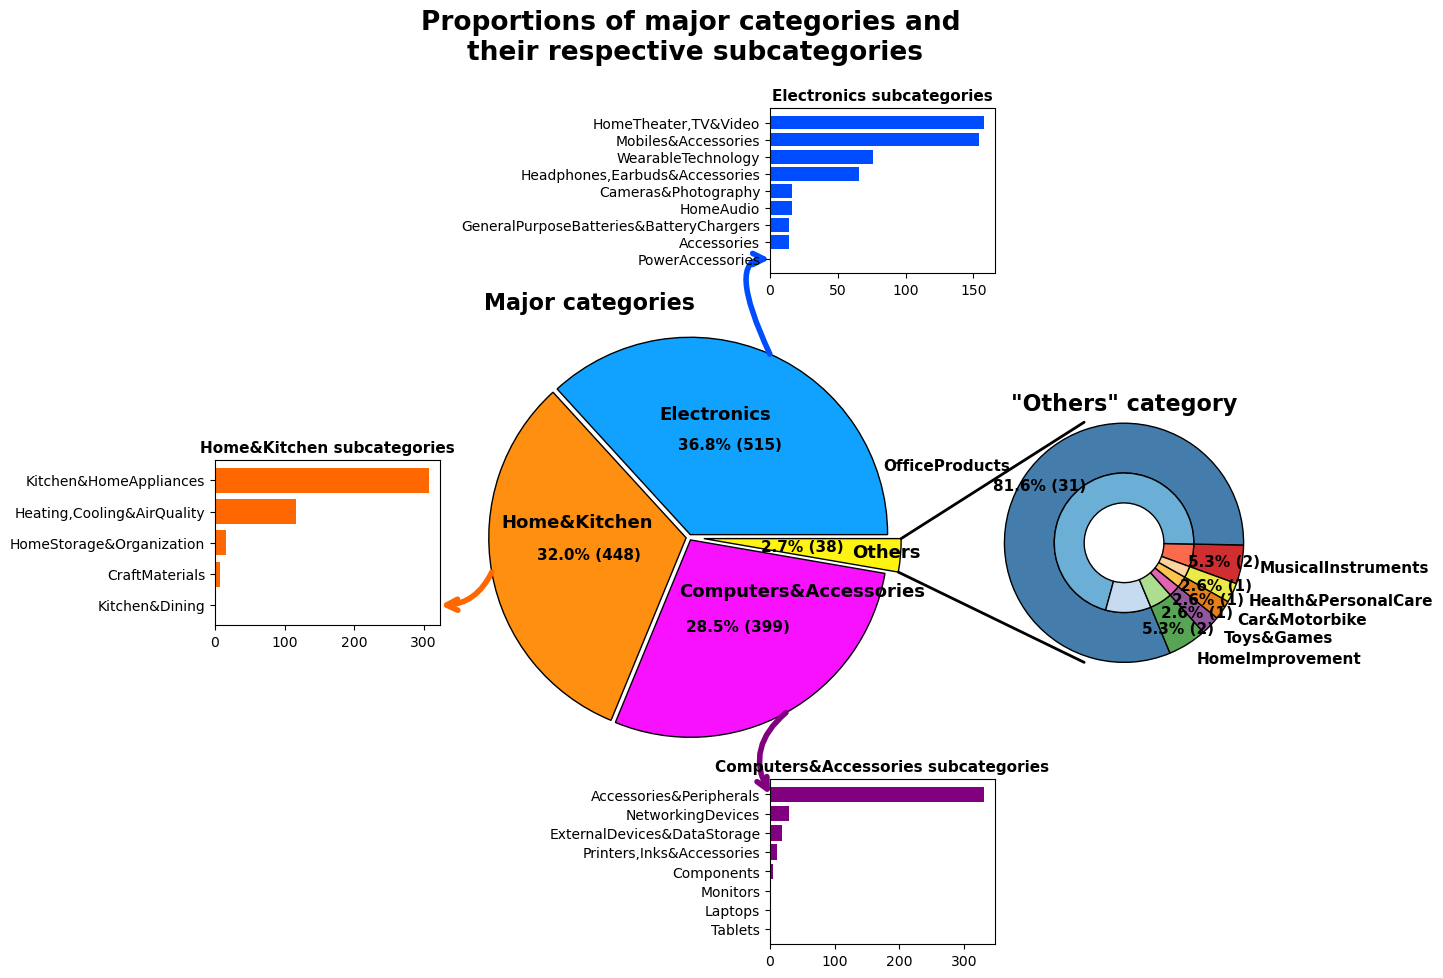

In [11]:
subc_font = {'fontsize':11, 'fontweight':'bold'}
col_outer = ['#11A1FF','#FF8F11', '#F811FF', '#FFF411']

#Create a figure instance
fig = plt.figure(figsize=(15,11))
fig.suptitle('Proportions of major categories and \ntheir respective subcategories', size=19, weight='bold')

#Major categories pie
ax1 = fig.add_subplot(3, 3, 5, position=[0.3, 0.3, 0.4, 0.4])
ax1.pie(maj_cat.values(), radius=2, wedgeprops={'edgecolor':'black'}, explode=[0.03, 0.03, 0.03, 0.15],
        autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p*sum(maj_cat.values())/100),
        startangle=(180*list(maj_cat.values())[3]), colors=col_outer, pctdistance=0.5, 
        textprops={'fontsize':11, 'fontweight':'bold'})
ax1.set_title('Major categories', fontdict={'fontsize':16, 'fontweight':'bold', 'ha':'right'})
ax1.annotate(text='Electronics', xy=(-0.3, 1.2), xytext=(-0.3, 1.2), fontsize=13, fontweight='bold')
ax1.annotate(text='Home&Kitchen', xy=(-1.9, 0.1), xytext=(-1.9, 0.1), fontsize=13, fontweight='bold')
ax1.annotate(text='Computers&Accessories', xy=(-0.1, -0.6), xytext=(-0.1, -0.6), fontsize=13, fontweight='bold')
ax1.annotate(text='Others', xy=(1.65, -0.2), xytext=(1.65, -0.2), fontsize=13, fontweight='bold')
ax1.axis('equal')

#Others pie
ax2 = fig.add_subplot(3, 3, 6)
ax2.pie(oth_dict.values(), radius=1.2, wedgeprops={'width':0.5, 'edgecolor':'black'}, labels=list(oth_dict.keys()),
        autopct=lambda p:'{:.1f}% ({:.0f})'.format(p, p*sum(oth_dict.values())/100), 
        startangle=(-20), pctdistance=0.85, labeldistance=1.15, colors=sns.color_palette('Set1', desat=0.8), 
        textprops={'fontsize':11, 'fontweight':'bold'})
ax2.pie(oth_subc_cnt.values(), radius=0.7, wedgeprops={'width':0.3, 'edgecolor':'black'}, startangle=(-20),
        colors=['#fb6a4a', '#6baed6', '#c6dbef', '#addd8e', '#df65b0', '#fec44f', '#fdd49e'])
ax2.set_title('"Others" category', fontdict={'fontsize':16, 'fontweight':'bold'})

#Electronics bar
ax3 = fig.add_subplot(3, 3, 2)
ax3.set_position([0.55, 0.74, 0.15, 0.15])
ax3.barh(y=list(el_subcat_cnt.keys()), width=list(el_subcat_cnt.values()), color='#004dff')
ax3.set_title('Electronics subcategories', fontdict=subc_font)

#Home&Kitchen bar
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_position([0.18, 0.42, 0.15, 0.15])
ax4.barh(y=list(hk_subcat_cnt.keys()), width=list(hk_subcat_cnt.values()), color='#ff6800')
ax4.set_title('Home&Kitchen subcategories', fontdict=subc_font)

#Computers&Accessories bar
ax5 = fig.add_subplot(3, 3, 8)
ax5.set_position([0.55, 0.13, 0.15, 0.15])
ax5.barh(y=list(ca_subcat_cnt.keys()), width=list(ca_subcat_cnt.values()), color='purple')
ax5.set_title('Computers&Accessories subcategories', fontdict=subc_font)

#Extracting a middle theta of Electronics and drawing a connection line to the bar
for i in range(len(list(maj_cat.keys())[:3])): 
    theta1, theta2 = ax1.patches[i].theta1, ax1.patches[i].theta2
    fin_th = ((np.pi/180*theta2) + (np.pi/180*theta1))/2
    center, r = ax1.patches[i].center, ax1.patches[i].r
    x = r*np.cos(fin_th) + center[0]
    y = r*np.sin(fin_th) + center[1]
    
    if i == 0:
        axes = ax3
        xy = (0, 0)
        col = '#004dff'
        con = 'angle3,angleA=0,angleB=-65'
    elif i == 1:
        axes = ax4
        xy = (324, 0)
        col = '#ff6800'
        con = 'arc3,rad=0.3'
    else:
        axes = ax5
        xy = (0, 7)
        col = 'purple'
        con = 'arc3,rad=-0.4'
    con = ConnectionPatch(xyA=xy, coordsA='data', axesA=axes, 
                          xyB=(x, y), coordsB='data', axesB=ax1, 
                          arrowstyle='<-', color=col, connectionstyle=con, mutation_scale=20)
    # con.set_color('black')
    con.set_linewidth(4)
    axes.add_artist(con)

#Constructing extensions for "Others"
    #geometrical properties
theta1, theta2 = ax1.patches[3].theta1, ax1.patches[3].theta2
center, r = ax1.patches[3].center, ax1.patches[3].r
    #upper line coordinates
x = r*np.cos(np.pi/180*theta2) + center[0]
y = r*np.sin(np.pi/180*theta2) + center[1]
    #upper line construction
con = ConnectionPatch(xyA=(-0.4, 1.21), coordsA='data', axesA=ax2, 
                      xyB=(x, y), coordsB='data', axesB=ax1)
con.set_color('black')
con.set_linewidth(2)
ax2.add_artist(con)

    #lower line coordinates
x = r*np.cos(np.pi/180*theta1) + center[0]
y = r*np.sin(np.pi/180*theta1) + center[1]
    #lower line construction
con = ConnectionPatch(xyA=(-0.4, -1.2), coordsA='data', axesA=ax2, 
                      xyB=(x, y), coordsB='data', axesB=ax1)
con.set_color('black')
con.set_linewidth(2)
ax2.add_artist(con)

plt.show()

#### **Summary** <a id="section3-1-3"></a>
Most of the products belong to the Electronics category (36.8%), followed by Home&Kitchen (32.0%) and
Computers&Accessories (28.5%). These three main categories can be subdivied into 9, 5, and 8 subcategories, respectively. Within Electronics, HomeTheater accounts for approximately 150 products, closely by Mobiles&Accessories; Home&Kithchen the largest subcategory is Kitchen&HomeAppliances (around 300 products); Computers&Accessories the largest subcategory is Accessories&Peripherals, which has 331 products, and also happens to be the largest subcategory among all.

On the other hand, the "Others" six categories account for slightly less than 3% altogether. Within, the OfficeProducts category has the greatest share of more than 80% and consists of 2 subcategories, while the rest categories are all grouped at the bottom with only one subcategory each and just 1-2 products. 

### **2. Top 5 product types in major categories** <a id="section3-2"></a>

<a id="section3-2-1"></a>
- Preparing the data

Each of the major categories contains multiple product types. We try to investigate, which of the product types is presented the most in the dataset.

In [52]:
electr_cnt = Counter(df['product_type'].loc[df['main_category']=='Electronics'])
hk_cnt = Counter(df['product_type'].loc[df['main_category']=='Home&Kitchen'])
ca_cnt = Counter(df['product_type'].loc[df['main_category']=='Computers&Accessories'])

print(f'Electronics: {len(electr_cnt)}, Home&Kitchen: {len(hk_cnt)}, Computers&Accessories: {len(ca_cnt)}')

Electronics: 62, Home&Kitchen: 72, Computers&Accessories: 55


Each category contains too many product types to be visualised properly. Therefore, only the top 5 types will be selected in each major category.

In [53]:
#Electronics
electr_cnt_five = electr_cnt.most_common(5)
#top 5 product count is saved as a list (for further plotting)
five_electr = [tp[1] for tp in electr_cnt_five]

#Home&Kitchen
hk_cnt_five = hk_cnt.most_common(5)
five_hk = [tp[1] for tp in hk_cnt_five]

#Computers&Accessories
ca_cnt_five = ca_cnt.most_common(5)
five_ca = [tp[1] for tp in ca_cnt_five]


<a id="section3-2-2"></a>
- Plotting

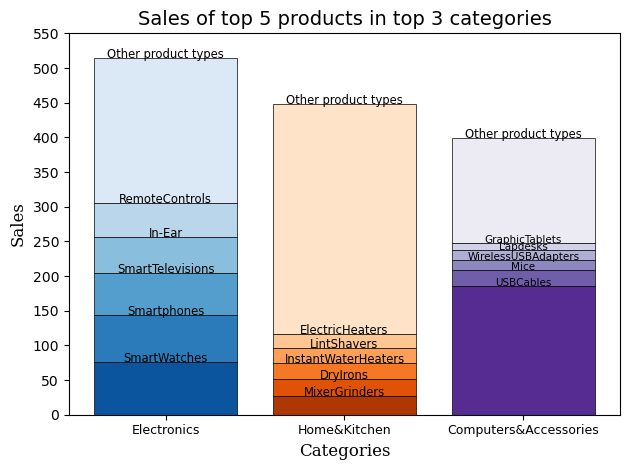

In [51]:
#Colour palettes 
col_el = sns.color_palette('Blues_r')
col_hk = sns.color_palette('Oranges_r')
col_ca = sns.color_palette('Purples_r')

#Create a function to display product type names on the graph
def add_labels(var1, var2, var3, n):
    ''' The function distributes respected names of 5 top products (lists must be created in advance)
    from top 3 categories at the top of each nested bar
    Pass in: lists of tuples [(x1, y1), (xn, yn),...], where x1, xn - names; y1, yn - counter values
            n-number of categories
    NOTE: the function only works with 3 categories, x coordinate is passed manually according to the number of categories
        in other cases requires thorough revision
    NOTE: product type names positions are calculated to be displayed on top of a respected bar column
    NOTE: since it's a nested bar, height parameter is calculated as cumulative sum of values before i ([:i]+[i])
    '''
    for j in list(range(n)):
        if j == 0:
            val1 = [tp[1] for tp in var1] #retrieve counter values from 1st list
            ks1 = [tp[0] for tp in var1] #retrieve counter keys from 1st list

            #iterate over every product name
            for i in range(len(ks1)):
                plt.text(j, sum(val1[:i])+val1[i], ks1[i], ha='center', size='small') #calculate location of labels
            plt.text(j, sorted(cat_cnt.values(), reverse=True)[j], 'Other product types', ha='center', size='small') #add another label at the top

        # below it's repeated same as in the 1st iteration
        elif j == 1:
            val2 = [tp[1] for tp in var2]
            ks2 = [tp[0] for tp in var2]
            for i in range(len(ks2)):
                plt.text(j, sum(val2[:i])+val2[i], ks2[i], ha='center', size='small')
            plt.text(j, sorted(cat_cnt.values(), reverse=True)[j], 'Other product types', ha='center', size='small')

        elif j == 2:
            val3 = [tp[1] for tp in var3]
            ks3 = [tp[0] for tp in var3]
            for i in range(len(ks3)):
                plt.text(j, sum(val3[:i]) + val3[i], ks3[i], ha='center', size=7.5)
            plt.text(j, sorted(cat_cnt.values(), reverse=True)[j], 'Other product types', ha='center', size='small')

#Stack bar
bottom = 0
cnt = 0
for i in list(range(0,3)):
    # Electronics
    if i == 0:
        for j in range(len(five_electr)):
            #1-5 top products starting from the bottom
            plt.bar(list(maj_cat.keys())[i], five_electr[j], bottom=bottom, color=col_el[j], edgecolor='black', linewidth=0.5)
            bottom = sum(five_electr[:j+1])
            cnt += 1
            if cnt == 5:
                #the rest of the products (displayed as the sum)
                plt.bar(list(maj_cat.keys())[i], list(maj_cat.values())[i]-sum(five_electr), bottom=sum(five_electr),
                        color=col_el[j+1], edgecolor='black', linewidth=0.5)
    #process is similar for the rest 2 categories
    bottom = 0
    cnt = 0
    if i == 1:
        for j in range(len(five_hk)):
            plt.bar(list(maj_cat.keys())[i], five_hk[j], bottom=bottom, color=col_hk[j], edgecolor='black', linewidth=0.5)
            bottom = sum(five_hk[:j + 1])
            cnt += 1
            if cnt == 5:
                plt.bar(list(maj_cat.keys())[i], list(maj_cat.values())[i]-sum(five_hk), bottom=sum(five_hk),
                        color=col_hk[j+1], edgecolor='black', linewidth=0.5)
    bottom = 0
    cnt = 0
    if i == 2:
        for j in range(len(five_ca)):
            plt.bar(list(maj_cat.keys())[i], five_ca[j], bottom=bottom, color=col_ca[j], edgecolor='black', linewidth=0.5)
            bottom = sum(five_ca[:j + 1])
            cnt += 1
            if cnt == 5:
                plt.bar(list(maj_cat.keys())[i], list(maj_cat.values())[i]-sum(five_ca), bottom=sum(five_ca),
                        color=col_ca[j+1], edgecolor='black', linewidth=0.5)

add_labels(electr_cnt_five, hk_cnt_five, ca_cnt_five, 3)
plt.yticks(ticks=list(range(0, 600, 50)))
plt.xticks(fontsize=9)
font_lbls = {'family': 'serif', 'color':'black', 'size': 12}
font_title = {'family': 'sans-serif', 'color':'black', 'size': 14}
plt.xlabel('Categories', fontdict=font_lbls)
plt.ylabel('Sales', fontdict=font_lbls)
plt.title('Sales of top 5 products in top 3 categories', fontdict=font_title)
plt.tight_layout()
plt.show()


#### **Summary** <a id="section3-2-3"></a>

Although Electronics has the greatest amount of products, with a closer look at each of the major categories, 
it appears that USB cables (Computer$Accessories) is the most presented product type, accounting for slightly less than 200 products.
Regarding Electronics and Home&Kitchen, the top 5 product types differ slightly in amount within their respective categories, 
being roughly around 70 and 25 units, respectively.

Conclusions:
Based on the observations, several conclusions can be drawn:
- Among all the products there are 3 major categories: Electronics (515 products), followed by Home&Kitchen (448),
and Computer$Accessories(399); among the other 6 categories, OfficeProducts is the most presented (32), with the rest having 1 or 2 products;
- Although according to the amount of products Electronics leading, it is USB cables (Computer$Accessories) product type that has more products than any other type

### **3. Prices analysis** <a id="section3-3"></a>

Actual and discounted price distribution comparison is required to not only observe the price range within each of the major categories, but also to see the effect of discounts.

<a id="section3-3-1"></a>
- Preparing the data

In [3]:
#1. Retrieving the discount and actual price values for 3 major categories

#Electronics
rng_el_disc = list(dict(df.loc[df['main_category'] == 'Electronics', 'discounted_price_rupee']).values())
rng_el_act = list(dict(df.loc[df['main_category'] == 'Electronics', 'actual_price_rupee']).values())

#Home&Kitchen
rng_hk_disc = list(dict(df.loc[df['main_category'] == 'Home&Kitchen', 'discounted_price_rupee']).values())
rng_hk_act = list(dict(df.loc[df['main_category'] == 'Home&Kitchen', 'actual_price_rupee']).values())

#Computers&Accessories
rng_ca_disc = list(dict(df.loc[df['main_category'] == 'Computers&Accessories', 'discounted_price_rupee']).values())
rng_ca_act = list(dict(df.loc[df['main_category'] == 'Computers&Accessories', 'actual_price_rupee']).values())

#2. Storing some 25th and 75th percentile values for 3 major categories

#Electronics
el_25_act = np.percentile(pd.DataFrame(rng_el_act), 25)
el_75_act = np.percentile(pd.DataFrame(rng_el_act), 75)
el_25_disc = np.percentile(pd.DataFrame(rng_el_disc), 25)
el_75_disc = np.percentile(pd.DataFrame(rng_el_disc), 75)

#Home&Kitchen
hk_25_act = np.percentile(pd.DataFrame(rng_hk_act), 25)
hk_75_act = np.percentile(pd.DataFrame(rng_hk_act), 75)
hk_25_disc = np.percentile(pd.DataFrame(rng_hk_disc), 25)
hk_75_disc = np.percentile(pd.DataFrame(rng_hk_disc), 75)

#Computers&Accessories
ca_25_act = np.percentile(pd.DataFrame(rng_ca_act), 25)
ca_75_act = np.percentile(pd.DataFrame(rng_ca_act), 75)
ca_25_disc = np.percentile(pd.DataFrame(rng_ca_disc), 25)
ca_75_disc = np.percentile(pd.DataFrame(rng_ca_disc), 75)

#3. Calculating "maximum" values (AKA Q3-1.5*IQR, where:
#           Q3 - third quartile, IQR - the interquartile range)

#Electronics
cps_el_disc = (el_75_disc-(1.5 * (el_25_disc - el_75_disc)))
cps_el_act = (el_75_act-(1.5 * (el_25_act - el_75_act)))

#Home&Kitchen
cps_hk_disc = (hk_75_disc - (1.5 * (hk_25_disc - hk_75_disc)))
cps_hk_act = (hk_75_act - (1.5 * (hk_25_act - hk_75_act)))

#Computers&Accessories
cps_ca_disc = (ca_75_disc - (1.5 * (ca_25_disc - ca_75_disc)))
cps_ca_act = (ca_75_act - (1.5 * (ca_25_act - ca_75_act)))

<a id="section3-3-2"></a>
- Visualisation with box plots

The logarithmic scale helps to observe values distributions more clearly; meanwhile, linear scale distributions may also provide some valuable insights and, hence, should not be neglected. 

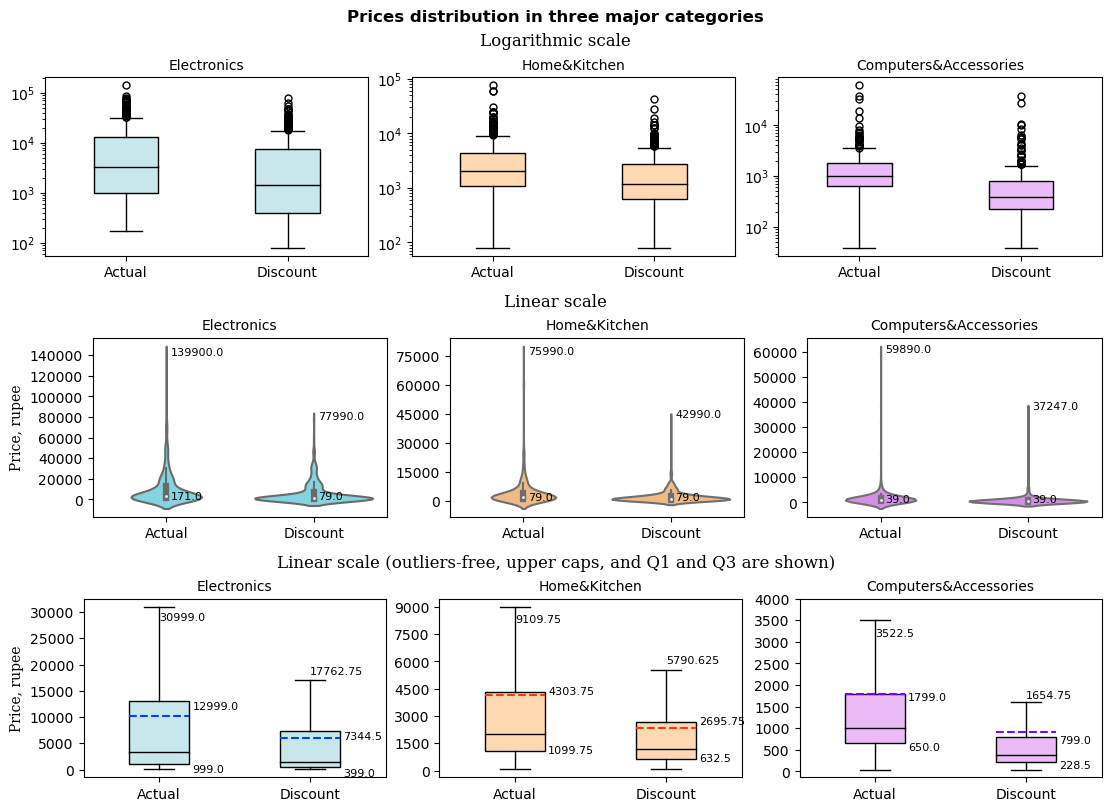

In [5]:
#Font format dictionaries
font_ttl = {'family':'sans-serif', 'color':'black', 'size': 13}
font_suptls = {'family':'serif', 'color':'black', 'size':10}
font_supl_ttl = {'family':'sans-serif', 'color':'black', 'size':10}
ylabel = {'family':'serif', 'size':'10'}
flies_prop = {'markersize':5}

#Create a main figure
fig = plt.figure(constrained_layout=True, figsize=(11,8))
fig.suptitle('Prices distribution in three major categories', fontdict=font_ttl, fontweight='bold')

#Create a subfigure with 3 rows
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):

    #Make an individual title for each row
    if row == 0:
        subfig.suptitle('Logarithmic scale', fontdict=font_suptls)
    elif row == 1:
        subfig.suptitle('Linear scale', fontdict=font_suptls)
    elif row == 2:
        subfig.suptitle('Linear scale (outliers-free, upper caps, and Q1 and Q3 are shown)', fontdict=font_suptls)

    #Within each row create subplots in 3 columns
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        if col == 0: # 1st column
            ax.set_title('Electronics', fontdict=font_supl_ttl)
            if row == 0: #ax[0,0]
                ax.boxplot([rng_el_act, rng_el_disc], labels=['Actual', 'Discount'], widths=0.4, patch_artist=True,
                                 boxprops={'facecolor': '#C7E7EC', 'color': 'black'},
                                 medianprops={'color': 'black'}, flierprops=flies_prop)
                ax.semilogy()
                
            elif row == 1: #ax[1,0]
                ax = sns.violinplot([rng_el_act, rng_el_disc], ax=ax, color='#73dff0')
                ax.set_xticklabels(['Actual', 'Discount'])
                ax.set_yticks(list(range(0, 150000, 20000)))
                ax.set_ylabel("Price, rupee", fontdict=ylabel)
                for i, lbl in enumerate([max(rng_el_act), min(rng_el_act), max(rng_el_disc), min(rng_el_disc)]):
                    if i//2==0:
                        x = 0.03
                    else:
                        x = 1.03
                    ax.annotate(text=lbl, xy=(x, lbl), fontsize=8)
                    
            elif row == 2: #ax[2,0]
                ax.boxplot([rng_el_act, rng_el_disc], labels=['Actual', 'Discount'], widths=0.4, sym='', patch_artist=True,
                                 boxprops={'facecolor': '#C7E7EC', 'color': 'black'}, medianprops={'color': 'black'},
                                showmeans=True, meanline=True, meanprops={'color':'#0440EF', 'linewidth':1.5})
                ax.set_yticks(list(range(0, 31000, 5000)))
                ax.set_ylabel("Price, rupee", fontdict=ylabel)
                ax.text(x=1, y=cps_el_act-1000, s=cps_el_act, fontsize=8, va='top')
                ax.text(x=2, y=cps_el_disc, s=cps_el_disc, fontsize=8, va='bottom')

                ax.text(x=1.22, y=el_25_act-2000, s=el_25_act, fontsize=8, va='bottom', ha='left')
                ax.text(x=1.22, y=el_75_act-2000, s=el_75_act, fontsize=8, va='bottom', ha='left')
                ax.text(x=2.22, y=el_25_disc-2000, s=el_25_disc, fontsize=8, va='bottom', ha='left')
                ax.text(x=2.22, y=el_75_disc-2000, s=el_75_disc, fontsize=8, va='bottom', ha='left')

        elif col == 1: #2nd column
            ax.set_title('Home&Kitchen', fontdict=font_supl_ttl)
            if row == 0: #ax[0,1]
                ax.boxplot([rng_hk_act, rng_hk_disc], labels=['Actual', 'Discount'], widths=0.4, patch_artist=True,
                                 boxprops={'facecolor': '#FFD9B2', 'color': 'black'},
                                medianprops={'color': 'black'}, flierprops=flies_prop)
                ax.semilogy()

            elif row == 1: #ax[1,1]
                ax = sns.violinplot([rng_hk_act, rng_hk_disc], ax=ax, color='#ffba74')
                ax.set_xticklabels(['Actual', 'Discount'])
                ax.set_yticks(list(range(0, 76000, 15000)))
                for i, lbl in enumerate([max(rng_hk_act), min(rng_hk_act), max(rng_hk_disc), min(rng_hk_disc)]):
                    if i//2==0:
                        x = 0.03
                    else:
                        x = 1.03
                    ax.annotate(text=lbl, xy=(x, lbl), fontsize=8)

            elif row == 2: #ax[2,1]
                ax.boxplot([rng_hk_act, rng_hk_disc], labels=['Actual', 'Discount'], widths=0.4, sym='',
                        patch_artist=True, boxprops={'facecolor': '#FFD9B2', 'color': 'black'}, medianprops={'color': 'black'},
                        showmeans=True, meanline=True, meanprops={'color':'#FF3803', 'linewidth':1.5})
                ax.set_yticks(list(range(0, 9100, 1500)))
                ax.text(x=1, y=cps_hk_act-500, s=cps_hk_act, fontsize=8, va='top')
                ax.text(x=2, y=cps_hk_disc, s=cps_hk_disc, fontsize=8, va='bottom')
                ax.text(x=1.22, y=hk_25_act+300, s=hk_25_act, fontsize=8, va='top', ha='left')
                ax.text(x=1.22, y=hk_75_act+300, s=hk_75_act, fontsize=8, va='top', ha='left')
                ax.text(x=2.22, y=hk_25_disc+300, s=hk_25_disc, fontsize=8, va='top', ha='left')
                ax.text(x=2.22, y=hk_75_disc+300, s=hk_75_disc, fontsize=8, va='top', ha='left')

        elif col == 2:
            ax.set_title('Computers&Accessories', fontdict=font_supl_ttl)
            if row == 0: #ax[0,2]
                ax.boxplot([rng_ca_act, rng_ca_disc], labels=['Actual', 'Discount'], widths=0.4, patch_artist=True,
                                 boxprops={'facecolor': '#EABBF7', 'color': 'black'},
                                medianprops={'color': 'black'}, flierprops=flies_prop)
                ax.semilogy()

            elif row == 1: #ax[1,2]
                sns.violinplot([rng_ca_act, rng_ca_disc], ax=ax, color='#dc80f5')
                ax.set_xticklabels(['Actual', 'Discount'])
                ax.set_yticks(list(range(0, 70000, 10000)))
                for i, lbl in enumerate([max(rng_ca_act), min(rng_ca_act), max(rng_ca_disc), min(rng_ca_disc)]):
                    if i//2==0:
                        x = 0.03
                    else:
                        x = 1.03
                    ax.annotate(text=lbl, xy=(x, lbl), fontsize=8)

            elif row == 2: #ax[2,2]
                ax.boxplot([rng_ca_act, rng_ca_disc], labels=['Actual', 'Discount'], widths=0.4, sym='',
                           patch_artist=True, boxprops={'facecolor': '#EABBF7', 'color': 'black'}, medianprops={'color': 'black'},
                           showmeans=True, meanline=True, meanprops={'color':'#8300FF', 'linewidth':1.5})
                ax.set_yticks(list(range(0, 4500, 500)))
                ax.text(x=1, y=cps_ca_act-200, s=cps_ca_act, fontsize=8, va='top')
                ax.text(x=2, y=cps_ca_disc, s=cps_ca_disc, fontsize=8, va='bottom')
                ax.text(x=1.22, y=ca_25_act-200, s=ca_25_act, fontsize=8, va='bottom', ha='left')
                ax.text(x=1.22, y=ca_75_act-200, s=ca_75_act, fontsize=8, va='bottom', ha='left')
                ax.text(x=2.22, y=ca_25_disc-200, s=ca_25_disc, fontsize=8, va='bottom', ha='left')
                ax.text(x=2.22, y=ca_75_disc-200, s=ca_75_disc, fontsize=8, va='bottom', ha='left')
plt.show()

#### **Summary** <a id="section3-3-3"></a>

##### Actual Prices
Electronics has the widest price distribution range of almost 140 thousand Indian rupees, 
with the lowest price of 171 and the highest at 139900 rupees. The highest price 
reaches approximately 75 thousand and 60 thousand in Home&Kitchen and Computers&Accessories major categories, respectively.
Actual price distributions are positively skewed for all 3 major categories.

##### Largest discount prices.
The largest discounts were given to the products with the highest prices in their respective categories.
In Electronics, the highest price was brought down from 139900 to 
77990 rupees (discount amount being equal to 61910 rupees). In Computers&Accessories, the highest price of 59890 rupees, similarly, has the largest discount (22643 rupees). However, in Home&Kitchen category, the highest price of 75990 rupees received a 33000 rupees discount (43%), while the greatest discount of 45500 rupees (76%) was given to a product with the second highest price in this category (59900 rupees).

##### General trends
Prices in each of the major categories are unevenly distributed. The position of median values and the bottom location of IQRs are all signs of highly unevenly distributed right-skewed data. Drastic outliers are also presented. Discounts in all major categories are quite noticeable, significantly bringing down Q1 and Q3, as well as "maximum" (Q3-15*IQR) values. Since the mean value is more sensitive to outlier values, compared to the median, 
its reduction by almost twice (except for Electronics) also confirms the efficiency of discount, meaning that prices of outlier products were reduced substantially, too. In turn, the median was reduced by approximately twice in all 3 major categories 
(e.g. Electronics from 3299 to 1399 rupees). 
    
In general, prices in three major categories are widely distributed, with about 10% of prices lying beyond "maximum" (Q3-15*IQR),
which dramatically affects some key statistical values. However, visualisation confirms the efficiency of discounts, 
since the 25th and 75th percentiles were reduced by roughly twice (except for Electronics), as well as means, in 3 major categories.



### **4. Subcategories exploration** <a id="section3-4"></a>

As can be seen, the prices in each of the major categories are spread widely. This is the result of the main categories consisting of multiple subcategories that combine different types of products. Hence, splitting the data by subcategory may provide valuable information on prices distribution.  

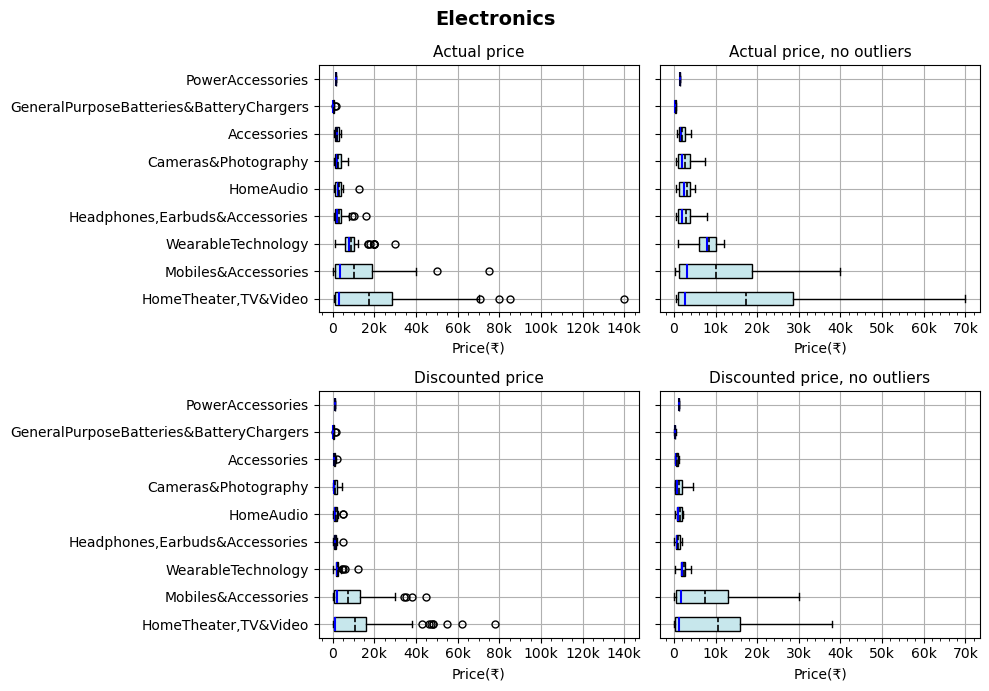

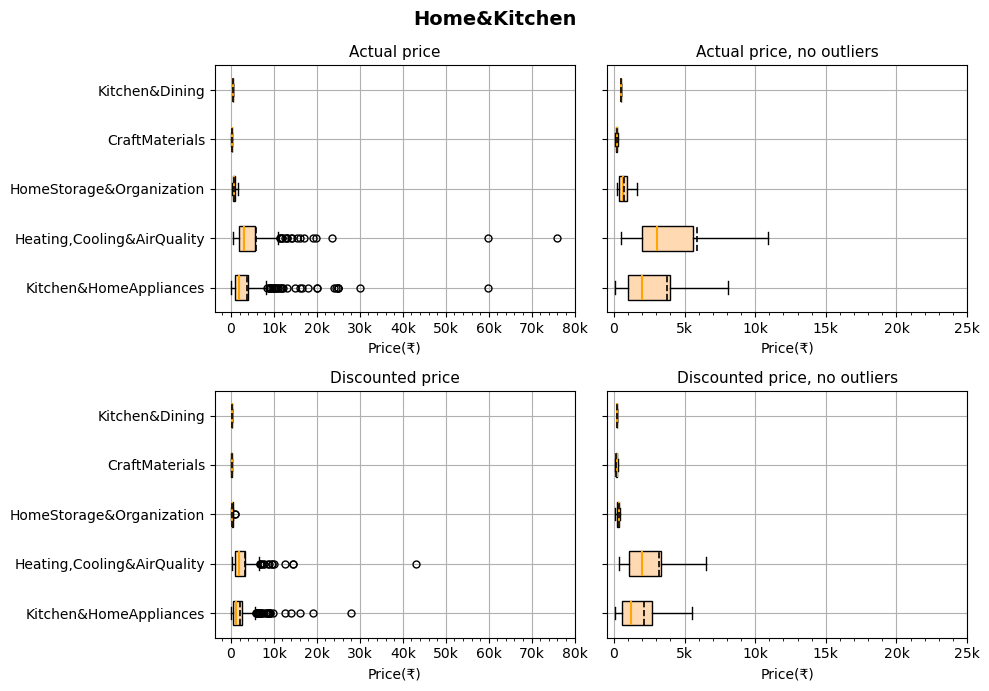

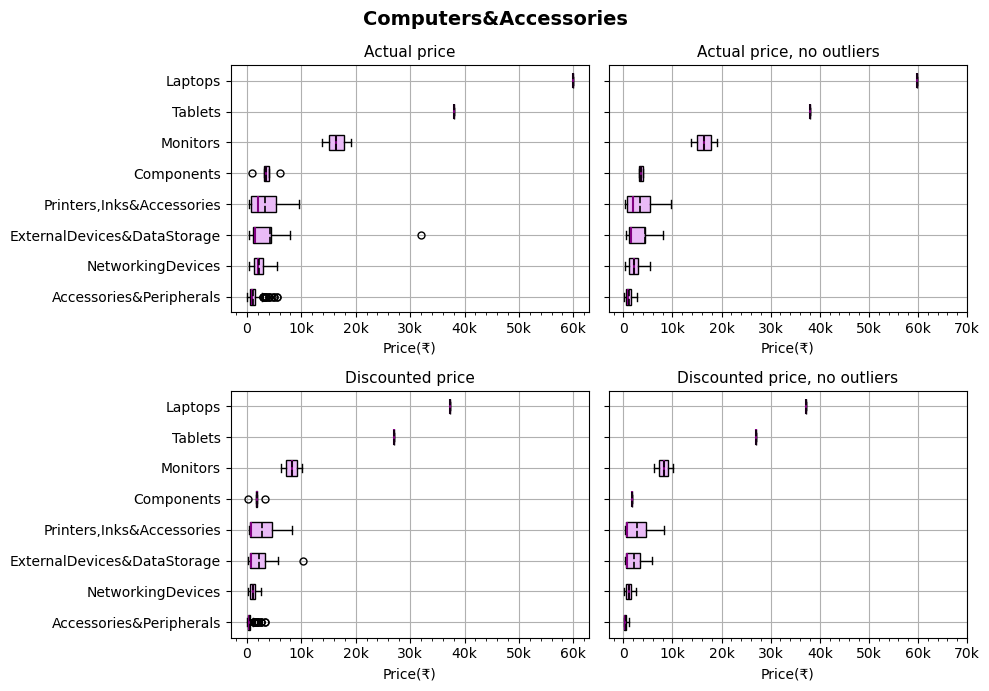

In [5]:
font_subttls = {'family':'sans-serif', 'color':'black', 'size':11}

### Box plot function
def create_boxplot(category, price, position, bx_cl, med_cl, outliers=True): 
    if not outliers:
        out = ''
    else:
        out = 'o'
    
    # Extracting labels for respected subcategories
    subcat_cnt = Counter(df.loc[df['main_category']==category, 'subcategory_main']) 
    srted_cnt = dict(sorted(subcat_cnt.items(), key=lambda x: x[1], reverse=True))
    subcat = list(srted_cnt.keys())
    
    # Boxplot configurations
    ax = fig.add_subplot(position)
    ax.boxplot([[pr for j, pr in enumerate(df.loc[df['subcategory_main']==sub, price])] for i, sub in enumerate(subcat)], 
               vert=False, sym=out, patch_artist=True, boxprops=dict(facecolor=bx_cl, color='black'), medianprops=dict(color=med_cl, lw=1.5),
               flierprops=dict(markersize=5), showmeans=True, meanline=True, meanprops=dict(color='black', lw=1.2))
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.set_xlabel('Price(₹)')
    ax.grid(visible=True)
    
    return ax, subcat

#### Plotting
cat = ['Electronics', 'Home&Kitchen', 'Computers&Accessories']
pr_type = ['actual_price_rupee', 'discounted_price_rupee']
box_facecolor = ['#C7E7EC', '#FFD9B2', '#EABBF7']
med_colors = ['blue', 'orange', 'purple']

for i in range(len(cat)):
    for j in range(len(pr_type)):
        if j < 1:
            # Setting custom ranges for each of the main categories
            if i == 0:
                rng_long = range(0, int(max(df.loc[df['main_category']==cat[i], pr_type[j]]) + 10000), 20000)
                rng_short = range(0, int(np.quantile(df.loc[df['main_category']==cat[i], pr_type[j+1]], 0.75)*10), 10000)
                
                xticklbls_long = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_long]
                xticklbls_short = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_short]
            elif i == 1:
                rng_long = range(0, int(max(df.loc[df['main_category']==cat[i], pr_type[j]]) + 10000), 10000)
                rng_short = range(0, int(np.quantile(df.loc[df['main_category']==cat[i], pr_type[j+1]], 0.75)*10), 5000)
                
                xticklbls_long = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_long]
                xticklbls_short = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_short]
            else:
                rng_long = range(0, int(max(df.loc[df['main_category']==cat[i], pr_type[j]]) + 10000), 10000)
                rng_short = range(0, int(np.quantile(df.loc[df['main_category']==cat[i], pr_type[j+1]], 0.75)*100), 10000)
                
                xticklbls_long = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_long]
                xticklbls_short = [f'{tick//1000}k' if tick!=0 else f'{tick}' for tick in rng_short]
            
            # Figure instance
            fig = plt.figure(figsize=(10, 7))
            fig.suptitle(cat[i], fontsize=14, fontweight='bold')
            
            # Actual price, with outliers    
            ax1, y_lbls = create_boxplot(cat[i], pr_type[j], 221, box_facecolor[i], med_colors[i])
            ax1.set_title(f"{pr_type[j].split('_', 1)[0].capitalize()} price", fontdict=font_subttls)
            ax1.set_yticklabels(y_lbls)
            ax1.set_xticks(rng_long) 
            ax1.set_xticklabels(xticklbls_long)

            # Actual price, without outliers
            ax2, y_lbls = create_boxplot(cat[i], pr_type[j], 222, box_facecolor[i], med_colors[i], outliers=False)
            ax2.set_title(f"{pr_type[j].split('_', 1)[0].capitalize()} price, no outliers", fontdict=font_subttls)
            ax2.set_yticklabels([])
            ax2.set_xticks(rng_short) 
            ax2.set_xticklabels(xticklbls_short)

            # Discounted price, with outliers
            ax3, y_lbls = create_boxplot(cat[i], pr_type[j+1], 223, box_facecolor[i], med_colors[i])
            ax3.set_title(f"{pr_type[j+1].split('_', 1)[0].capitalize()} price", fontdict=font_subttls)
            ax3.sharey(ax1)
            ax3.sharex(ax1)

            # Discounted price, without outliers
            ax4, y_lbls = create_boxplot(cat[i], pr_type[j+1], 224, box_facecolor[i], med_colors[i], outliers=False)
            ax4.set_title(f"{pr_type[j+1].split('_', 1)[0].capitalize()} price, no outliers", fontdict=font_subttls)
            ax4.sharey(ax2)
            ax4.sharex(ax2)     
           
            plt.tight_layout()
            plt.show()

#### **Summary**

Each main category includes numerous subcategories; however, prices are distributed unevenly within each of them. It is most noticeable in Electronics, where two subcategories (HomeTheater,TV&Video and Mobiles&Accessories) have the widest distributions, whereas the rest subcategories are much narrower and do not surpass 20k rupees. On the other hand, some of the subcategories are split furhter into more specific subtypes that have not ben accounted for. In any case, simple visualisation of prices distribution within subcategories demonstrates the importance if consideration of more detailed product classifications to draw more robust conclusions about distribution of prices.

### **5. Discounts exploration** <a id="section3-5"></a> 

The analysis of discount ranges may help to answer some questions regarding discounts relative efficiency. In order to observe main statistical values more clearly outliers on charts with discount amounts are being omitted.

<a id="section3-5-1"></a>
- Preparing the data

In [56]:
# Retrieving discount values 
disc_el = list(df.loc[df['main_category'] == 'Electronics', 'discount_amount_rupee'])
disc_hk = list(df.loc[df['main_category'] == 'Home&Kitchen', 'discount_amount_rupee'])
disc_ca = list(df.loc[df['main_category'] == 'Computers&Accessories', 'discount_amount_rupee'])

# Retrieving discount percentages
disc_perc_el = list(df.loc[df['main_category'] == 'Electronics', 'discount_percentage'])
disc_perc_hk = list(df.loc[df['main_category'] == 'Home&Kitchen', 'discount_percentage'])
disc_perc_ca = list(df.loc[df['main_category'] == 'Computers&Accessories', 'discount_percentage'])

# Making compound lists
all_disc_val = [disc_el, disc_hk, disc_ca] #list of lists of true discount values
all_disc_perc = [disc_perc_el, disc_perc_hk, disc_perc_ca] #list of lists of discount percentages

<a id="section3-5-2"></a>
- Plotting

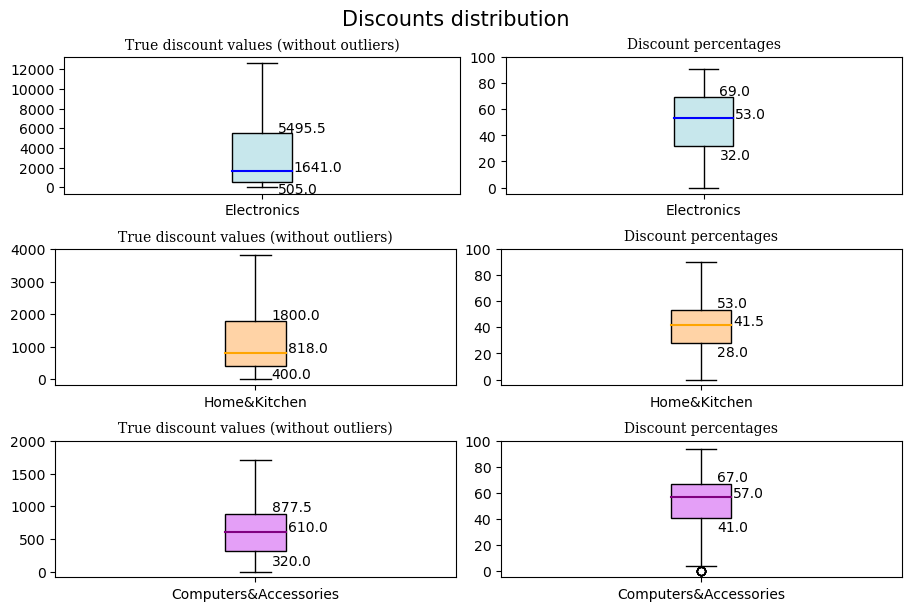

In [22]:
#colours lists
box_col = ['#C7E7EC', '#FFD3A6', '#E49FF7']
med_col = ['blue', 'orange', 'purple']

#creating a figure instance
fig = plt.figure(constrained_layout=True, figsize=(9,6))
fig.suptitle('Discounts distribution', fontsize=15) 

#adding subfigures
subfigs = fig.subfigures(nrows=3, ncols=1)

for row, subfig in enumerate(subfigs):
    axs = subfig.subplots(nrows=1, ncols=2)
    for col, ax in enumerate(axs):
        
        #column with true discount values
        if col == 0:
            ax.boxplot(all_disc_val[row], sym='', labels=[list(maj_cat.keys())[row]], patch_artist=True,
                       boxprops={'facecolor':box_col[row]}, medianprops={'color':med_col[row], 'linewidth':1.5})
            ax.text(x=1.04, y=np.percentile(all_disc_val[row], 75)+50, s=np.percentile(all_disc_val[row], 75)) #75th perc
            ax.text(x=1.08, y=np.median(all_disc_val[row]), s=np.median(all_disc_val[row])) #median
            ax.text(x=1.04, y=np.percentile(all_disc_val[row], 25)-50, s=np.percentile(all_disc_val[row], 25), va='top') #25th perc
            ax.set_title('True discount values (without outliers)', fontdict={'family':'serif', 'size':10})
            #independent y-ticks ranges for different major categories
            if row == 0:
                ax.set_yticks(list(range(0, 13000, 2000)))
            elif row == 1:
                ax.set_yticks(list(range(0, 5000, 1000)))
            elif row == 2:
                ax.set_yticks(list(range(0, 2100, 500)))

        #column with discount percentages
        elif col == 1:
            ax.boxplot(all_disc_perc[row], labels=[list(maj_cat.keys())[row]], patch_artist=True,
                       boxprops={'facecolor':box_col[row]}, medianprops={'color':med_col[row], 'linewidth':1.5})
            ax.text(x=1.04, y=np.percentile(all_disc_perc[row], 75)+2, s=np.percentile(all_disc_perc[row], 75)) #75th perc
            ax.text(x=1.08, y=np.median(all_disc_perc[row]), s=np.median(all_disc_perc[row])) #median
            ax.text(x=1.04, y=np.percentile(all_disc_perc[row], 25)-2, s=np.percentile(all_disc_perc[row], 25), va='top') #25th perc
            ax.set_title('Discount percentages', fontdict={'family':'serif', 'size':10})
            ax.set_yticks(list(range(0,110, 20)))

plt.show()

#### **Summary** <a id="section3-5-3"></a>
Looking at discount percentage values, 75% of discounts for products in Electronics and Computers&Accessories 
were below 69% and 67%, respectively (Home&Kitchen below 53%). Electronics has the widest interquartile range (IQR) 
of 37%, followed by Computers&Accessories (26%) and Home&Kitchen (25%).

Concerning discount amounts, Electronics once again has the widest IQR from 505 to 5495.5 rupees. This must be because Electronics also has the widest range of actual price. IQR of discount amounts ranges from 400 to 1800 rupees in Home&Kitchen, and from 320 to 877.5 in Computers&Accessories, suggesting that the latter one has many low-priced products.

### **6. Ratings** <a id="section3-6"></a>

A rating is an evaluation provided by customers, it generally reflects customers' satisfaction with product quality, functionality, delivery, etc. Hence, having the understanding of how ratings are distributed and what they depend on.

<a id="section3-6-1"></a>
- Preparing the data

In [57]:
#Obtain total rating count
#check for NAs
df['rating'].isna().sum() # one NA
rating = [i for i in df['rating'] if not math.isnan(i)] # omit all NAs
rt_cnt = Counter(rating)

#Group ratings by category
rt_el = [i for i in df.loc[df['main_category'] == 'Electronics', 'rating'] if not math.isnan(i)]
rt_hk = [i for i in df.loc[df['main_category'] == 'Home&Kitchen', 'rating'] if not math.isnan(i)]
rt_ca = [i for i in df.loc[df['main_category'] == 'Computers&Accessories', 'rating'] if not math.isnan(i)]

#Counter of ratings within each category
rt_el_cnt = Counter(rt_el)
rt_hk_cnt = Counter(rt_hk)
rt_ca_cnt = Counter(rt_ca)

<a id="section3-6-2"></a>
- PLotting

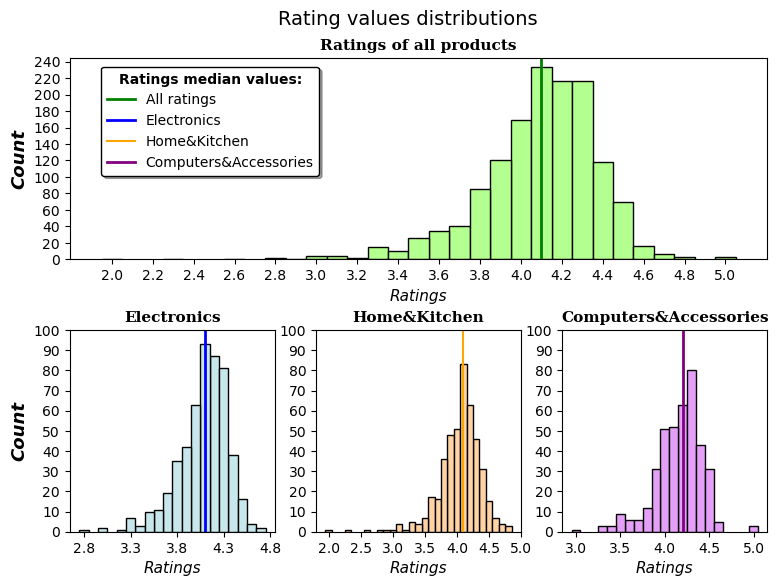

In [8]:
gs = GridSpec(nrows=2, ncols=3, hspace=0.35, wspace=0.2)

#set figure
fig = plt.figure(figsize=(9,6))
fig.suptitle('Rating values distributions', fontsize=14)
fig.subplots_adjust(top=0.9, hspace=0.3)

#matrix layout using GridSpec
gs = GridSpec(nrows=2, ncols=3, hspace=0.35, wspace=0.2)

    #all ratings chart
ax0 = fig.add_subplot(gs[0,:])
ax0.bar(x=list(rt_cnt.keys()), height=rt_cnt.values(), edgecolor='black', width=0.1, color='#B3FF8F')
ax0.axvline(np.median(rating), color='green', lw=2, label='All ratings')
ax0.set_xticks(np.round(np.arange(min(rating), max(rating)+0.1, 0.2), 1))
ax0.set_yticks(list(range(0, max(rt_cnt.values())+10, 20)))
ax0.set_xlabel('Ratings', fontsize=11, fontstyle='italic')
ax0.set_ylabel('Count', fontsize=13, fontstyle='italic', fontweight='bold')
ax0.set_title('Ratings of all products', fontdict={'family':'serif', 'size':11}, fontweight='bold')

    #Electronics
ax1 = fig.add_subplot(gs[1,0])
rt_el_cnt = Counter(rt_el)
ax1.bar(x=list(rt_el_cnt.keys()), height=rt_el_cnt.values(), edgecolor='black', width=0.1, color='#C7E7EC')
ax1.axvline(np.median(rt_el), color='blue', lw=2, label='Electronics')
ax1.set_xticks(np.round(np.arange(min(rt_el), max(rt_el)+0.2, 0.5), 1))
ax1.set_yticks(list(range(0, max(rt_el_cnt.values())+10, 10)))
ax1.set_xlabel('Ratings', fontsize=11, fontstyle='italic')
ax1.set_ylabel('Count', fontsize=13, fontstyle='italic', fontweight='bold')
ax1.set_title('Electronics', fontdict={'family':'serif', 'size':11}, fontweight='bold')

    #Home&Kitchen
ax2 = fig.add_subplot(gs[1,1])
rt_hk_cnt = Counter(rt_hk)
ax2.bar(x=list(rt_hk_cnt.keys()), height=rt_hk_cnt.values(), edgecolor='black', width=0.1, color='#FFD3A6')
ax2.axvline(np.median(rt_hk), color='orange', lw=1.5, label='Home&Kitchen')
ax2.set_xticks(np.round(np.arange(min(rt_hk), max(rt_hk)+0.3, 0.5), 1))
ax2.set_yticks(list(range(0, max(rt_hk_cnt.values())+10, 10)))
ax2.set_xlabel('Ratings', fontsize=11, fontstyle='italic')
# ax2.set_ylabel('Count', fontsize=11, fontstyle='italic')
ax2.set_title('Home&Kitchen', fontdict={'family':'serif', 'size':11}, fontweight='bold')

    #Computers&Accessories
ax3 = fig.add_subplot(gs[1,2])
rt_ca_cnt = Counter(rt_ca)
ax3.bar(x=list(rt_ca_cnt.keys()), height=rt_ca_cnt.values(), edgecolor='black', width=0.1, color='#E49FF7')
ax3.axvline(np.median(rt_ca), color='purple', lw=2, label='Computers&Accessories')
ax3.set_xticks(np.round(np.arange(min(rt_ca), max(rt_ca)+0.2, 0.5), 1))
ax3.set_yticks(list(range(0, max(rt_ca_cnt.values())+10, 10)))
ax3.set_xlabel('Ratings', fontsize=11, fontstyle='italic')
# ax3.set_ylabel('Count', fontsize=11, fontstyle='italic')
ax3.set_title('Computers&Accessories', fontdict={'family':'serif', 'size':11}, fontweight='bold')

    #share y-axes of major category plots
ax2.sharey(ax1)
ax3.sharey(ax2)

    #adjust legend
fig.legend(loc=(0.13, 0.70), frameon=True, edgecolor='black', shadow=True).set_title(
    'Ratings median values:', prop={'size':10, 'weight':'bold'})

plt.show()

#### **Summary** <a id="section3-6-3"></a>    
It appears that all rating distributions are negatively skewed; median values of all products and two major categories
are located at 4.1 (Computers&Accessories at 4.2).

In all distributions median value coincides with a rating having the greatest count, except for Computers&Accessories, 
where the greatest count is at 4.3.

Regarding the distribution range, products with ratings range from 2.0 to 5.0. Home&Kitchen has the widest range of ratings (from 2.0 to 4.8). The Electronics has a similar rating distribution pattern but ranges only from 2.8 to 4.7. In Computers&Accessories most of the ratings fall between 3.3 to 4.6, with a couple of outliers located at 3.0 and 5.0.


### **7. Correlation estimation** <a id="section3-7"></a>

<a id="section3-7-1"></a>
- Preparing the data

Some groups of values in the dataset may correlate with others, being dependent or independent to some extent. Thus, in order to provide more valuable conclusions it is essential to estimate correlation in the dataset.

In [ ]:
#creating a correlation data frame 
df_cor = df.corr()

<a id="section3-7-2"></a>
- Plotting

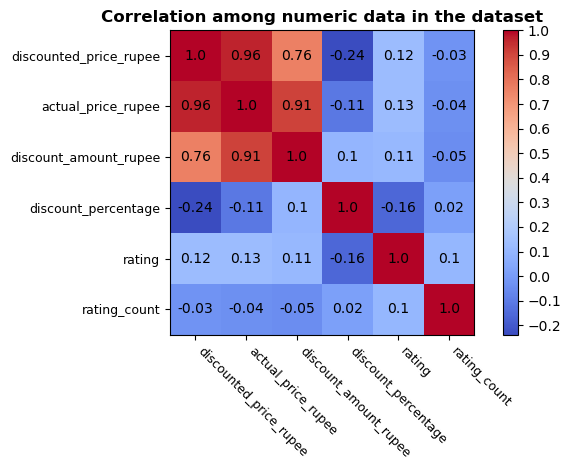

In [10]:
plt.imshow(df_cor, cmap='coolwarm')

#values annotations
for i in range(len(df_cor.index)):
    for j in range(len(df_cor.columns)):
        plt.text(j, i, np.round(np.array(df_cor)[i, j], 2), ha='center', va='center')

#Colorbar
plt.colorbar(ticks=list(np.arange(-0.2, 1.1, 0.1)))

#x-y ticks
plt.xticks(np.arange(len(df_cor.columns)), labels=list(df_cor.columns), fontsize=9)
plt.gcf().autofmt_xdate(rotation=-45, ha='left', bottom=0.3)
plt.yticks(np.arange(len(df_cor.index)), labels=list(df_cor.index), fontsize=9)

plt.title('Correlation among numeric data in the dataset', fontweight='bold')
plt.tight_layout()
plt.show()


#### **Summary** <a id="section3-7-3"></a>
There are no unusual correlations worth of interest. A strong positive correlation between the actual price and the discount amount confirms one of the previous observations that the higher the actual price, the higher the discount. On the other hand, actual price and discount percentage display a weak negative correlation.
Turning to product ratings, they display a very weak correlation with prices, both discount and actual, suggesting
that product evaluation depends on price very little. 

### **8. Actual price-Discount amount correlation** <a id="section3-8"></a>

Following Actual-Discount price correlation (0.96), the actual price and discount amount have the second largest correlation coefficient of 0.91.

<a id="section3-8-1"></a>
- Extracting actual prices and discount amounts by major and minor categories (the last one being grouped together as "Others")

In [59]:
#Electronics
act_el = [df['actual_price_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Electronics']
disc_el = [df['discount_amount_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Electronics']

#Home&Kitchen
act_hk = [df['actual_price_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Home&Kitchen']
disc_hk = [df['discount_amount_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Home&Kitchen']

#Computers&Accessories
act_ca = [df['actual_price_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Computers&Accessories']
disc_ca = [df['discount_amount_rupee'][i] for i in range(len(df['main_category'])) if df['main_category'][i] == 'Computers&Accessories']

#Others
act_oth = []
disc_oth = []
for i in range(len(df['main_category'])):
    if df['main_category'][i] not in list(maj_cat.keys())[:3]:
        act_oth.append(df['actual_price_rupee'][i])
        disc_oth.append(df['discount_amount_rupee'][i])

In [60]:
act_25 = np.round(np.percentile(df['actual_price_rupee'], 25), 1)
act_75 = np.round(np.percentile(df['actual_price_rupee'], 75), 1)
act_90 = np.round(np.percentile(df['actual_price_rupee'], 90), 1)
percentiles = [act_25, act_75, act_90]

<a id="section3-8-2"></a>
- Scatter plot

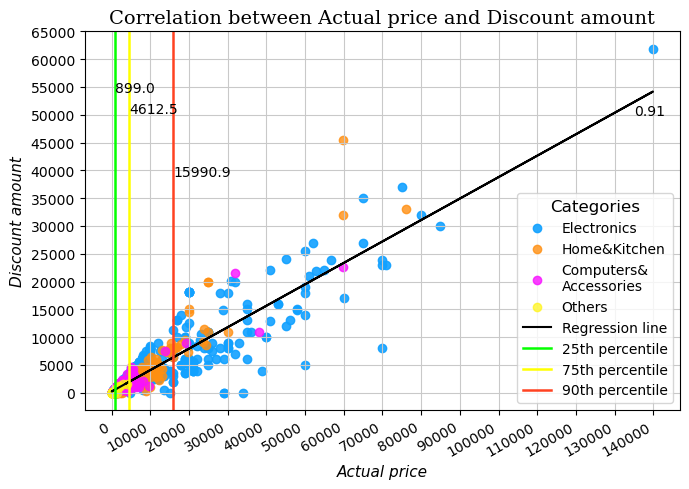

In [25]:
#set the figure
fig, ax = plt.subplots(figsize=(7,5))

#scatter plots of different categories
ax.scatter(act_el, disc_el, c='#11A1FF', label='Electronics', alpha=0.9)
ax.scatter(act_hk, disc_hk, c='#FF8F11', label='Home&Kitchen', alpha=0.8)
ax.scatter(act_ca, disc_ca, c='#F811FF', label='Computers&\nAccessories', alpha=0.8)
ax.scatter(act_oth, disc_oth, c='#FFF411', label='Others', alpha=0.7)

#regression line setup
slope, intercept = np.polyfit(df['actual_price_rupee'], df['discount_amount_rupee'], 1)

ax.plot(df['actual_price_rupee'], slope * np.array(df['actual_price_rupee']) + intercept,
        color='black', label='Regression line')
ax.text(x=135000, y=50000,
        s=np.round(df['actual_price_rupee'].corr(df['discount_amount_rupee']), 2))

#displaying percentiles 25th, 75th, and 90th percentiles
cols = ['#04FF00', '#FFFF00', '#FF4221']
lbls = [25, 75, 90]

for i in range(len(percentiles)):
    ax.axvline(percentiles[i], color=cols[i], lw=1.8, label=f'{lbls[i]}th percentile')
    ax.text(x=percentiles[i], y=55000-percentiles[i], s=percentiles[i], ha='left')

#general settings
plt.gcf().autofmt_xdate()
plt.xticks(list(range(0, 145000, 10000)))
plt.yticks(list(range(0, 70000, 5000)))
plt.xlabel('Actual price', fontsize=11, fontstyle='italic')
plt.ylabel('Discount amount', fontsize=11, fontstyle='italic')
plt.title('Correlation between Actual price and Discount amount', fontdict={'family':'serif', 'size':14})
plt.legend(loc='lower right', title='Categories', title_fontsize=12, fontsize=10)
plt.grid(visible=True, color='#C9C9C9')
plt.tight_layout()
plt.show()

#### **Summary** <a id="section3-8-3"></a>
The scatter plot depicts a clear positive correlation between actual price and discount amount. The price distribution is also shown, and it is in accordance with previous observations. Electronics has the widest dispersion and outliers of greater values, with one reaching up to almost 140 thousand rupees, while the largest outliers of Home&Kitchen and Computers&Accessories are at approximately 75 and 60 thousand rupees, respectively. With regard to the Others group, it is made up of 6 main categories, and the products in it are relatively inexpensive, with the maximum price being 4000 rupees (Car&Motorbike category). With the help of percentile lines, it can be seen that the IQR of this dataset is located between 899 and 4612.5 rupees, and 90% of all the products fall below approximately 16 thousand rupees.

# IV) Final Conclusions <a id='section4'></a>

#### **Summary**
Using major Python data analytic libraries (Pandas, NumPy, and MatPLotLib) the analysis of the Amazon Sales dataset has been carried out. The major goal of the present project was to use only Python packages to perform cleaning, filtering, visualisation, and data analysis. 

The following discoveries have been made:
1. All products can be divided into 9 categories. Within, Electronics, Home&Kitchen, and Computers&Accessories are
    the three major categories, containing 36.8%, 32%, and 28.5% of all the products, and contain 9, 5, and 8 subcategories , respectively, with Computers&Accessories having the largest subcategory of all (Accessories&Peripherals, 331 product). The rest of the categories account for only 2.8% in total, with OfficeProducts being the largest (81.6%, 2 subcategories, 31 products). One limit to keep in mind is that the present categorical and subcategorical segregations are fully based on personal judgment and may not reflect the real categories;
2. Looking at product types precisely, although Electronics is the most represented group, it is USB cables in
    Computers&Accessories that account for the largest number of products;
3. Prices and discounts: 
    - The price data is right-skewed and widely distributed, with approximately 10% being considered as outlier data (beyond "maximum" (Q3-15*IQR));
    - Electronics has the widest actual price distribution range (from 171 rupees to 140 thousand rupees), whereas
        the actual price ranges for Home&Kitchen and Computers&Accessories are 79-75,990 and 39-59,890 rupees, respectively;
    - The largest discounts are found to be given for the highest prices in major categories 
        (to the second highest price in Home&Kitchen);
    - The middle ranges (IQR) of true discount values are 505-5495.5, 400-1800, 320-877.5 rupees for  Electronics, Home&Kitchen, and Computers&Accessories, respectively;
4. Turning to the ratings, the distribution is negatively skewed, with the median rating of all data being equal to 4.1;
5. There appears to be no correlation between prices and ratings, though actual price and discount amount display 
    are highly positively correlated.

#### **Suggestions**
1. Major categories appear to be highly diverse in terms of prices, which drastically affects statistical values.
Although major categories were artificially assigned in the scope of this project, replacing them with subcategories
would be more efficient for a more detailed price analysis;

2. In Home&Kitchen category, 75% of discounts lay below 53%, while in two other major categories below 69% and 67%.
Therefore, discounts in this category could be reconsidered and raised at least by 5%, especially for some costly products.         
